In [1]:
import gym
#env = gym.make('LunarLander-v2')
#env.seed(0)
'''
for _ in range(500):
    env.render()
    prox_estado, recompensa, done, info = env.step(env.action_space.sample()) # take a random action
    print(prox_estado)
env.close()
'''

'\nfor _ in range(500):\n    env.render()\n    prox_estado, recompensa, done, info = env.step(env.action_space.sample()) # take a random action\n    print(prox_estado)\nenv.close()\n'

In [2]:
print(env.observation_space.sample())

NameError: name 'env' is not defined

In [3]:
#print(env.action_space.sample())
print(env.observation_space)

NameError: name 'env' is not defined

In [4]:
# Essa função deve rodar um episodio de Pong escolhendo ações aleatórias
def rodar_ambiente(episodios):
    # Criando o ambiente 'turing_envs:pong-easy-v0'
    env = gym.make("LunarLander-v2")
    #inicia_renderizacao()
 
    for i in range(episodios):
        
        # Loop de treino
        # Resete o ambiente e receba o primeiro estado
        estado = env.reset()
         # Inicializando done como false
        done = False
        
        while not done:
            # Escolha uma acao aleatoria
            acao = env.action_space.sample()

            # Tome essa acao e receba as informacoes do estado seguinte
            prox_estado, recompensa, done, info = env.step(acao)

            # Renderize o ambiente
            #salva_frame(env)
            env.render()

            # Atualizando o estado
            estado = prox_estado

    # Fechando o ambiente
    env.close()
    #termina_renderizacao()

In [5]:
# Testando a função
rodar_ambiente(5)

In [6]:
import numpy as np # Importando a biblioteca NumPy
import gym         # Importando a Biblioteca Gym

# Criando o nosso Ambiente: LunarLander-v2
env = gym.make("LunarLander-v2")

# Número total de ações: 4
n_acoes = env.action_space.n

print('Número de ações:', n_acoes)

Número de ações: 4


In [7]:
#O código pra discretização do estado, pega todos os valores do array e arredonda, deixando com uma casa decimal apenas
def discretiza_estado(estado):
    return tuple(round(x, 1) for x in estado)

In [8]:
# Constantes da Política Epsilon Greedy
# Epsilon: probabilidade de experimentar uma ação aleatória
EPSILON = 0.9        # Valor inicial do epsilon
EPSILON_MIN = 0.01   # Valor mínimo de epsilon
DECAIMENTO = 0.999    # Fator de decaímento do epsilon (por episódio)

In [9]:
def escolhe_acao(env, Q, estado, epsilon):
    # Se não conhecermos ainda o estado, inicializamos o Q de cada ação como 0
    if estado not in Q.keys(): 
        Q[estado] = [0] * n_acoes

    # Escolhemos um número aleatório com "np.random.random()"
    # Se esse número for menor que epsilon, tomamos uma ação aleatória
    if np.random.random() < epsilon:
        # Escolhemos uma ação aleatória, com env.action_space.sample()
        acao = env.action_space.sample()
    else:
        # Escolhemos a melhor ação para o estado atual, com np.argmax()
        acao = np.argmax(Q[estado])
    return acao

In [10]:


def roda_partida(env, Q, renderiza=True):
    if renderiza:
        pass
        #env.render()
        #inicia_renderizacao()
        
    # Resetamos o ambiente
    estado = env.reset()

    # Discretizamos o estado
    estado = discretiza_estado(estado)
    
    done = False
    retorno = 0
    
    while not done:
        # Escolhemos uma ação
        acao = escolhe_acao(env, Q, estado, epsilon=0)

        # Tomamos nossa ação escolhida e recebemos informações do próximo estado
        prox_estado, recompensa, done, info = env.step(acao)

        # Discretizamos o próximo estado
        prox_estado = discretiza_estado(prox_estado)

        # Renderizamos o ambiente
        if renderiza:
            #salva_frame(env)
            env.render()

        retorno += recompensa
        estado = prox_estado

    print(f'retorno {retorno:.1f}')
    
    env.close()
    
    if renderiza:
        pass
        #termina_renderizacao()

In [13]:
# Rodamos uma partida de Pong
Q = {}
roda_partida(env, Q)

retorno -141.3


In [14]:
Q

{(-0.0, 1.4, -0.4, -0.2, 0.0, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.0, 1.4, -0.4, -0.3, 0.0, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.0, 1.4, -0.4, -0.4, 0.0, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.0, 1.3, -0.4, -0.5, 0.0, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.0, 1.3, -0.4, -0.5, 0.1, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.1, 1.3, -0.4, -0.5, 0.1, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.1, 1.3, -0.4, -0.6, 0.1, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.1, 1.2, -0.4, -0.7, 0.1, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.1, 1.2, -0.4, -0.8, 0.1, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.1, 1.1, -0.4, -0.8, 0.1, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.1, 1.1, -0.4, -0.9, 0.1, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.1, 1.0, -0.4, -1.0, 0.1, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.1, 1.0, -0.4, -1.0, 0.2, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.1, 0.9, -0.4, -1.1, 0.2, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.2, 0.9, -0.4, -1.1, 0.2, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.2, 0.8, -0.4, -1.2, 0.2, 0.1, 0.0, 0.0): [0, 0, 0, 0],
 (-0.2, 0.8, -0.4, -1.3, 0.2, 0.1, 0.0, 

In [11]:
# Hiperparâmetros do Q-Learning
ALFA = 0.05          # Learning rate
GAMA = 0.99           # Fator de desconto

# Dicionário dos valores de Q
# Chaves: estados; valores: qualidade Q atribuida a cada ação
Q = {}

In [12]:
def atualiza_q(Q, estado, acao, recompensa, prox_estado):
    # para cada estado ainda não descoberto, iniciamos seu valor como nulo
    if estado not in Q.keys(): 
        Q[estado] = [0] * n_acoes
    if prox_estado not in Q.keys(): 
        Q[prox_estado] = [0] * n_acoes

    # equação do Q-Learning
    Q[estado][acao] = Q[estado][acao] + ALFA * (recompensa + GAMA * np.max(Q[prox_estado]) - Q[estado][acao])

In [13]:
import pickle

def salva_tabela(Q, nome = 'model-lunar.pickle'):
    with open(nome, 'wb') as pickle_out:
        pickle.dump(Q, pickle_out)

def carrega_tabela(nome = 'model-lunar.pickle'):
    with open(nome, 'rb') as pickle_out:
        return pickle.load(pickle_out)

In [14]:
N_EPISODIOS = 1000    # quantidade de episódios que treinaremos

In [17]:
def treina(env, Q):
    retornos = []      # retorno de cada episódio
    avg_scores = []
    epsilon = EPSILON
    scores_max = []
    scores_max_episodio = []
    
    for episodio in range(1, N_EPISODIOS+1):
        # resetar o ambiente
        estado = env.reset()

        # discretizar o estado inicial
        estado = discretiza_estado(estado)
        
        done = False
        retorno = 0
        
        while not done:
            # escolher uma ação
            acao = escolhe_acao(env, Q, estado, epsilon)

            # tomar a ação
            prox_estado, recompensa, done, info = env.step(acao)
            scores_max_episodio.append(recompensa)
            # discretizar o próximo estado
            prox_estado = discretiza_estado(prox_estado)

            atualiza_q(Q, estado, acao, recompensa, prox_estado)

            retorno += recompensa
            estado = prox_estado

        # calcular o próximo epsilon
        epsilon = epsilon * DECAIMENTO
        epsilon = max(epsilon, EPSILON_MIN)
        scores_max.append(max(scores_max_episodio))
        retornos.append(retorno)
        avg_score = np.mean(retornos[-10:])
        avg_scores.append(avg_score)
        
        if episodio % 1000 == 0:
            salva_tabela(Q)

        print(f'episódio {episodio},  '
              f'retorno {retorno:7.1f},  '
              f'retorno médio (últimos 10 episódios) {np.mean(retornos[-10:]):7.1f},  '
              f'Max Score: {max(scores_max_episodio):.3f}')
        scores_max_episodio = []
    return retornos, avg_scores, scores_max
    env.close()

In [18]:
retornos, avg_scores, scores_max = treina(env, Q)

episódio 1,  retorno  -256.5,  retorno médio (últimos 10 episódios)  -256.5,  Max Score: 15.018
episódio 2,  retorno  -173.6,  retorno médio (últimos 10 episódios)  -215.0,  Max Score: 38.615
episódio 3,  retorno   -20.6,  retorno médio (últimos 10 episódios)  -150.2,  Max Score: 111.172
episódio 4,  retorno  -195.2,  retorno médio (últimos 10 episódios)  -161.5,  Max Score: 6.799
episódio 5,  retorno  -309.3,  retorno médio (últimos 10 episódios)  -191.0,  Max Score: 4.789
episódio 6,  retorno  -109.3,  retorno médio (últimos 10 episódios)  -177.4,  Max Score: 66.806
episódio 7,  retorno   -33.9,  retorno médio (últimos 10 episódios)  -156.9,  Max Score: 22.018
episódio 8,  retorno  -172.4,  retorno médio (últimos 10 episódios)  -158.8,  Max Score: 28.424
episódio 9,  retorno  -132.5,  retorno médio (últimos 10 episódios)  -155.9,  Max Score: 6.843
episódio 10,  retorno   -91.3,  retorno médio (últimos 10 episódios)  -149.4,  Max Score: 6.722
episódio 11,  retorno  -194.5,  retorno mé

## 🏓 Testando nosso Agente Treinado

In [24]:
roda_partida(env, Q)

retorno -189.1


In [25]:
len(Q)

42783

## Alguns resultados

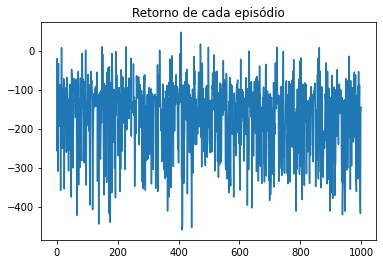

In [20]:
import matplotlib.pyplot as plt
plt.plot(retornos)
plt.title("Retorno de cada episódio")
plt.show()

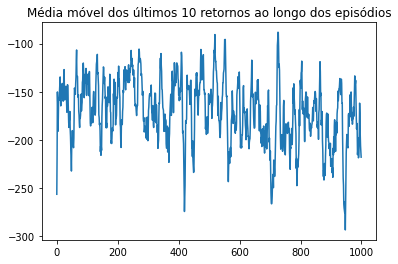

In [21]:
import matplotlib.pyplot as plt
plt.plot(avg_scores)
plt.title("Média móvel dos últimos 10 retornos ao longo dos episódios")
plt.show()

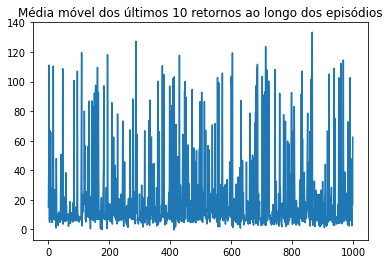

In [19]:
import matplotlib.pyplot as plt
plt.plot(scores_max)
plt.title("Pontuação Máxima de cada episódio")
plt.show()

In [22]:
max(scores_max)

133.3905274928054

In [25]:
cont = 0
for elemento in scores_max:
    if elemento >= 100:
        cont += 1

In [26]:
cont

37

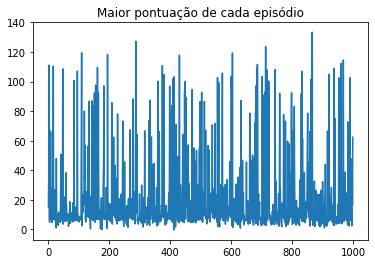

In [27]:
import matplotlib.pyplot as plt
plt.plot(scores_max)
plt.title("Maior pontuação de cada episódio")
plt.show()